https://platform.openai.com/docs/guides/image-generation?image-generation-model=gpt-image-1

In [2]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install openai
!pip install gradio

# Clean up the notebook
clean_notebook()

Notebook cleaned.


In [2]:
import os
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

True

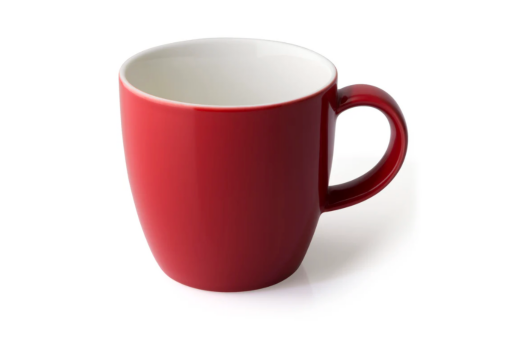

In [15]:
import matplotlib.pyplot as plt
from PIL import Image
# Path to your image
image_path = "./cup01.png"

# Display the image 
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [16]:
import os
import base64
from openai import OpenAI

# Initialize OpenAI client with API key
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

prompt = """
Generate a photorealistic image of a gift basket on a white background 
labeled 'AI4BA with Relax & Unwind' with a ribbon and handwriting-like font, 
containing all the items in the reference pictures.
"""

# Open the reference image (not in a list)
with open("./cup01.png", "rb") as image_file:
    result = client.images.edit(
        model="gpt-image-1",
        image=image_file,  # Single file-like object
        prompt=prompt
    )

# Decode and save the result
image_base64 = result.data[0].b64_json
image_bytes = base64.b64decode(image_base64)

with open("gift-basket.png", "wb") as f:
    f.write(image_bytes)


# Display Generated Image

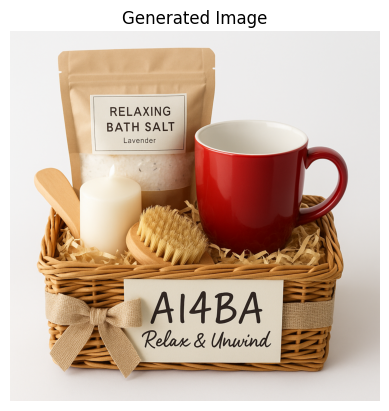

In [17]:
import base64
from io import BytesIO
import matplotlib.pyplot as plt
from PIL import Image

# Suppose image_bytes already contains the binary image data
# For example:
# image_bytes = base64.b64decode(image_base64)

# Convert bytes to PIL image
image = Image.open(BytesIO(image_bytes))

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title("Generated Image")
plt.show()
